### Importação dos dados



In [1]:
#importações
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()


,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


In [3]:
# Concatenar os dados das quatro lojas
todas_lojas = pd.concat([loja, loja2, loja3, loja4])

#1. Análise do faturamento


In [4]:
# Calculando o faturamento total de cada loja
faturamento_loja1 = loja["Preço"].sum()
faturamento_loja2 = loja2["Preço"].sum()
faturamento_loja3 = loja3["Preço"].sum()
faturamento_loja4 = loja4["Preço"].sum()

faturamento_loja1, faturamento_loja2, faturamento_loja3, faturamento_loja4

(np.float64(1534509.12),
 np.float64(1488459.06),
 np.float64(1464025.03),
 np.float64(1384497.58))

# 2. Vendas por Categoria


In [5]:
# Contar produtos por categoria em cada loja
contagem_loja1 = loja['Categoria do Produto'].value_counts().reset_index()
contagem_loja1.columns = ['Categoria', 'Quantidade']
contagem_loja1['Loja'] = 'Loja 1'

contagem_loja2 = loja2['Categoria do Produto'].value_counts().reset_index()
contagem_loja2.columns = ['Categoria', 'Quantidade']
contagem_loja2['Loja'] = 'Loja 2'

contagem_loja3 = loja3['Categoria do Produto'].value_counts().reset_index()
contagem_loja3.columns = ['Categoria', 'Quantidade']
contagem_loja3['Loja'] = 'Loja 3'

contagem_loja4 = loja4['Categoria do Produto'].value_counts().reset_index()
contagem_loja4.columns = ['Categoria', 'Quantidade']
contagem_loja4['Loja'] = 'Loja 4'

# Juntar todas as contagens em um único DataFrame para análise
contagem_total = pd.concat([contagem_loja1, contagem_loja2, contagem_loja3, contagem_loja4])
print(contagem_total)

               Categoria  Quantidade    Loja
0                 moveis         465  Loja 1
1            eletronicos         448  Loja 1
2             brinquedos         324  Loja 1
3       eletrodomesticos         312  Loja 1
4        esporte e lazer         284  Loja 1
5  instrumentos musicais         182  Loja 1
6                 livros         173  Loja 1
7  utilidades domesticas         171  Loja 1
0                 moveis         442  Loja 2
1            eletronicos         422  Loja 2
2             brinquedos         313  Loja 2
3       eletrodomesticos         305  Loja 2
4        esporte e lazer         275  Loja 2
5  instrumentos musicais         224  Loja 2
6                 livros         197  Loja 2
7  utilidades domesticas         181  Loja 2
0                 moveis         499  Loja 3
1            eletronicos         451  Loja 3
2             brinquedos         315  Loja 3
3       eletrodomesticos         278  Loja 3
4        esporte e lazer         277  Loja 3
5         

# 3. Média de Avaliação das Lojas

In [6]:
# Contar avaliações por loja
avaliacoes_loja1 = loja['Avaliação da compra'].value_counts().sort_index()
avaliacoes_loja2 = loja2['Avaliação da compra'].value_counts().sort_index()
avaliacoes_loja3 = loja3['Avaliação da compra'].value_counts().sort_index()
avaliacoes_loja4 = loja4['Avaliação da compra'].value_counts().sort_index()

# Criar um DataFrame resumido
resumo_avaliacoes = pd.DataFrame({
    'Loja 1': avaliacoes_loja1,
    'Loja 2': avaliacoes_loja2,
    'Loja 3': avaliacoes_loja3,
    'Loja 4': avaliacoes_loja4
}).fillna(0).astype(int)  # Preencher missing values com 0

print(resumo_avaliacoes)

                     Loja 1  Loja 2  Loja 3  Loja 4
Avaliação da compra                                
1                       319     273     297     310
2                        86      93      79      85
3                       218     209     193     210
4                       444     482     434     453
5                      1292    1302    1356    1300


# 4. Produtos Mais e Menos Vendidos

In [7]:
# Função para analisar os produtos mais e menos vendidos
def analisar_vendas(frequencia_produtos):
    produto_mais_vendido = frequencia_produtos.idxmax()
    quantidade_mais_vendido = frequencia_produtos.max()

    produto_menos_vendido = frequencia_produtos.idxmin()
    quantidade_menos_vendido = frequencia_produtos.min()

    return {
        "produto_mais_vendido": produto_mais_vendido,
        "quantidade_mais_vendido": quantidade_mais_vendido,
        "produto_menos_vendido": produto_menos_vendido,
        "quantidade_menos_vendido": quantidade_menos_vendido
    }

# Contar quantas vezes cada produto aparece em cada loja
frequencia_produtos1 = loja['Produto'].value_counts()
frequencia_produtos2 = loja2['Produto'].value_counts()
frequencia_produtos3 = loja3['Produto'].value_counts()
frequencia_produtos4 = loja4['Produto'].value_counts()

# Analisando cada loja
resultados = [
    ("Loja 1", analisar_vendas(frequencia_produtos1)),
    ("Loja 2", analisar_vendas(frequencia_produtos2)),
    ("Loja 3", analisar_vendas(frequencia_produtos3)),
    ("Loja 4", analisar_vendas(frequencia_produtos4)),
]

# Exibindo resultados de todas as lojas
for nome_loja, resultado in resultados:
    print(f"\n📊 **Resultados para a {nome_loja}:**")
    print(f"→ Produto MAIS vendido: '{resultado['produto_mais_vendido']}' (aparece {resultado['quantidade_mais_vendido']} vezes)")
    print(f"→ Produto MENOS vendido: '{resultado['produto_menos_vendido']}' (aparece {resultado['quantidade_menos_vendido']} vezes)")


📊 **Resultados para a Loja 1:**
→ Produto MAIS vendido: 'Micro-ondas' (aparece 60 vezes)
→ Produto MENOS vendido: 'Headset' (aparece 33 vezes)

📊 **Resultados para a Loja 2:**
→ Produto MAIS vendido: 'Iniciando em programação' (aparece 65 vezes)
→ Produto MENOS vendido: 'Jogo de tabuleiro' (aparece 32 vezes)

📊 **Resultados para a Loja 3:**
→ Produto MAIS vendido: 'Kit banquetas' (aparece 57 vezes)
→ Produto MENOS vendido: 'Blocos de montar' (aparece 35 vezes)

📊 **Resultados para a Loja 4:**
→ Produto MAIS vendido: 'Cama box' (aparece 62 vezes)
→ Produto MENOS vendido: 'Guitarra' (aparece 33 vezes)


# 5. Frete Médio por Loja


In [8]:
# Verificar o tipo de dado da coluna 'Frete' em cada loja
print("Loja 1 - Tipo de dado do Frete:", loja['Frete'].dtype)
print("Loja 2 - Tipo de dado do Frete:", loja2['Frete'].dtype)
print("Loja 3 - Tipo de dado do Frete:", loja3['Frete'].dtype)
print("Loja 4 - Tipo de dado do Frete:", loja4['Frete'].dtype)

Loja 1 - Tipo de dado do Frete: float64
Loja 2 - Tipo de dado do Frete: float64
Loja 3 - Tipo de dado do Frete: float64
Loja 4 - Tipo de dado do Frete: float64


In [9]:
# Calcular a média do frete por loja
media_frete_loja1 = loja['Frete'].mean()
media_frete_loja2 = loja2['Frete'].mean()
media_frete_loja3 = loja3['Frete'].mean()
media_frete_loja4 = loja4['Frete'].mean()

# Criar um DataFrame para visualização
medias_frete = pd.DataFrame({
    'Loja': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
    'Média do Frete (R$)': [
        media_frete_loja1,
        media_frete_loja2,
        media_frete_loja3,
        media_frete_loja4
    ]
})

print(medias_frete)

     Loja  Média do Frete (R$)
0  Loja 1            34.691805
1  Loja 2            33.621941
2  Loja 3            33.074464
3  Loja 4            31.278997


#*Graficos*

##grafico 01


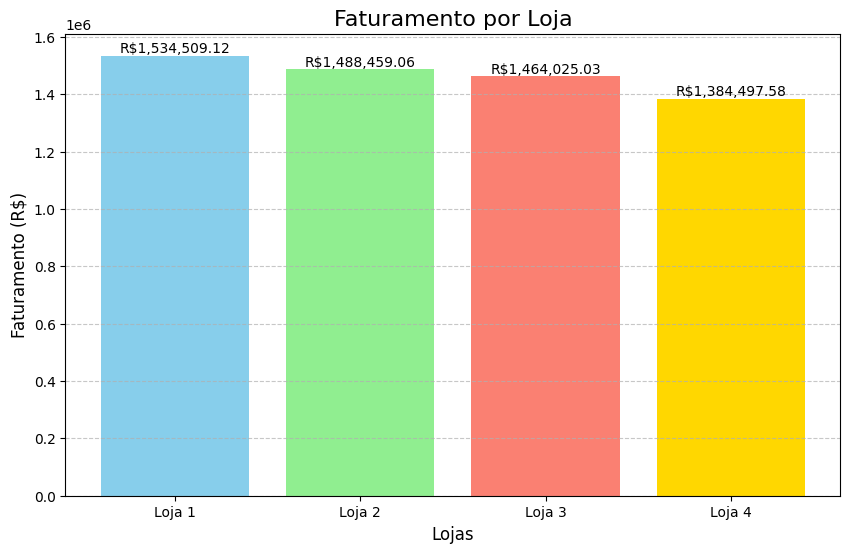

In [10]:
# Dados
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
faturamentos = [faturamento_loja1, faturamento_loja2, faturamento_loja3, faturamento_loja4]

# Criar o gráfico
plt.figure(figsize=(10, 6))  # Tamanho do gráfico
bars = plt.bar(lojas, faturamentos, color=['skyblue', 'lightgreen', 'salmon', 'gold'])

# Adicionar os valores em cima de cada barra
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'R${height:,.2f}',
             ha='center', va='bottom')

# Personalizar
plt.title('Faturamento por Loja', fontsize=16)
plt.xlabel('Lojas', fontsize=12)
plt.ylabel('Faturamento (R$)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar
plt.show()

##Grafico 02


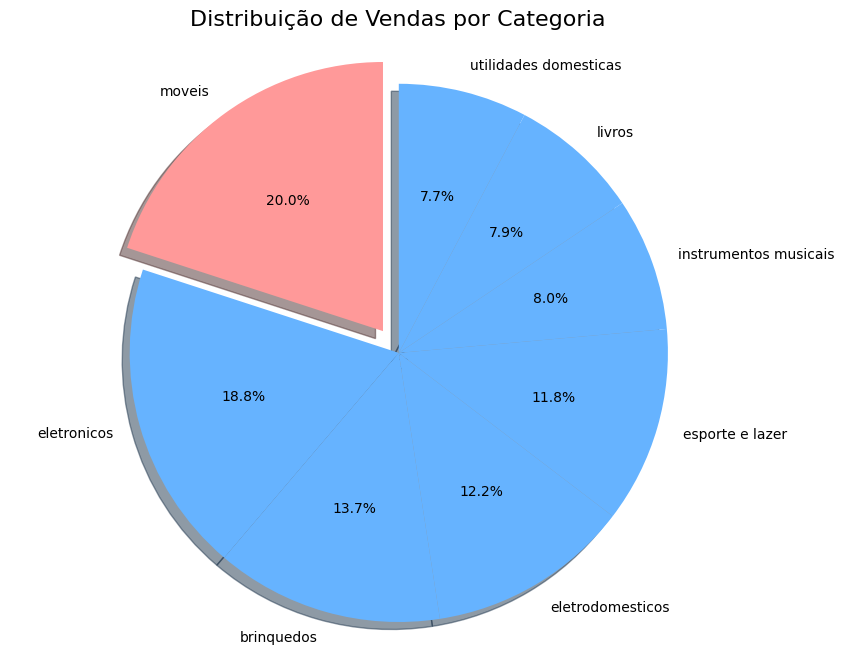

In [11]:
# Configurar o gráfico quantidade de Vendas por Categoria em Cada Loja

# Agrupar por categoria e somar as quantidades totais
categorias_totais = contagem_total.groupby('Categoria')['Quantidade'].sum().sort_values(ascending=False)

# Configurações do gráfico
plt.figure(figsize=(10, 8))
colors = ['#ff9999' if i == 0 else '#66b3ff' for i in range(len(categorias_totais))]  # Destaca a maior categoria
explode = [0.1 if i == 0 else 0 for i in range(len(categorias_totais))]  # "Explode" a maior fatia

# Criar o gráfico
plt.pie(
    categorias_totais,
    labels=categorias_totais.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    explode=explode,
    shadow=True
)

# Ajustes finais
plt.title('Distribuição de Vendas por Categoria', fontsize=16)
plt.axis('equal')  # Garante que o gráfico fique circular

# Mostrar
plt.show()

##grafico 03

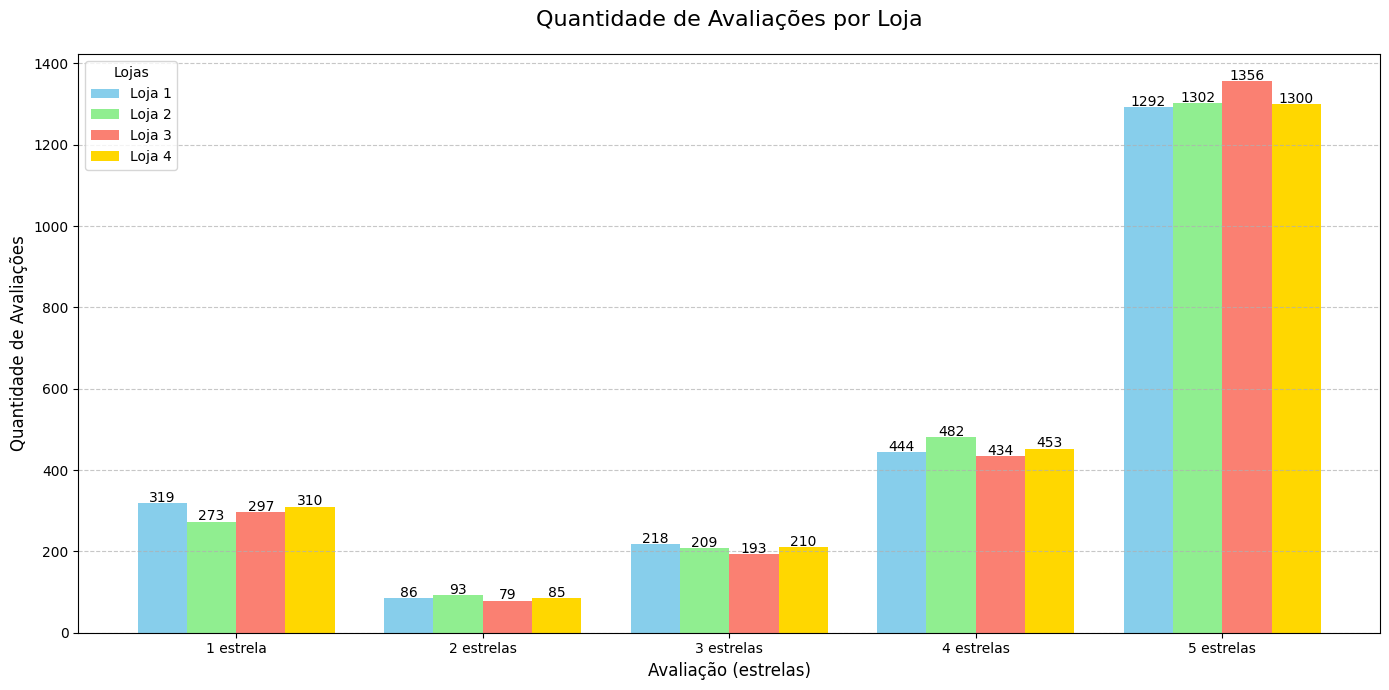

In [12]:
# Configurar o gráfico média das Avaliações por Loja

# Dados do DataFrame resumo_avaliacoes
avaliacoes = resumo_avaliacoes.index
lojas = resumo_avaliacoes.columns

# Cores para cada loja (como você definiu)
cores = ['skyblue', 'lightgreen', 'salmon', 'gold']

# Configurações do gráfico
plt.figure(figsize=(14, 7))
bar_width = 0.2  # Largura das barras
x_pos = np.arange(len(avaliacoes))  # Posições no eixo X

# Criar as barras para cada loja
for i, loja in enumerate(lojas):
    plt.bar(
        x_pos + i * bar_width,  # Deslocamento horizontal para cada loja
        resumo_avaliacoes[loja],
        width=bar_width,
        color=cores[i],
        label=loja
    )

# Personalização do gráfico
plt.title('Quantidade de Avaliações por Loja', fontsize=16, pad=20)
plt.xlabel('Avaliação (estrelas)', fontsize=12)
plt.ylabel('Quantidade de Avaliações', fontsize=12)
plt.xticks(x_pos + bar_width * 1.5, ['1 estrela', '2 estrelas', '3 estrelas', '4 estrelas', '5 estrelas'])
plt.legend(title='Lojas', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adicionar os valores em cima de cada barra
for i, loja in enumerate(lojas):
    for j, avaliacao in enumerate(avaliacoes):
        plt.text(
            x=x_pos[j] + i * bar_width,
            y=resumo_avaliacoes.loc[avaliacao, loja] + 3,  # 3 unidades acima da barra
            s=str(resumo_avaliacoes.loc[avaliacao, loja]),
            ha='center',
            fontsize=10
        )

plt.tight_layout()
plt.show()

##grafico 04

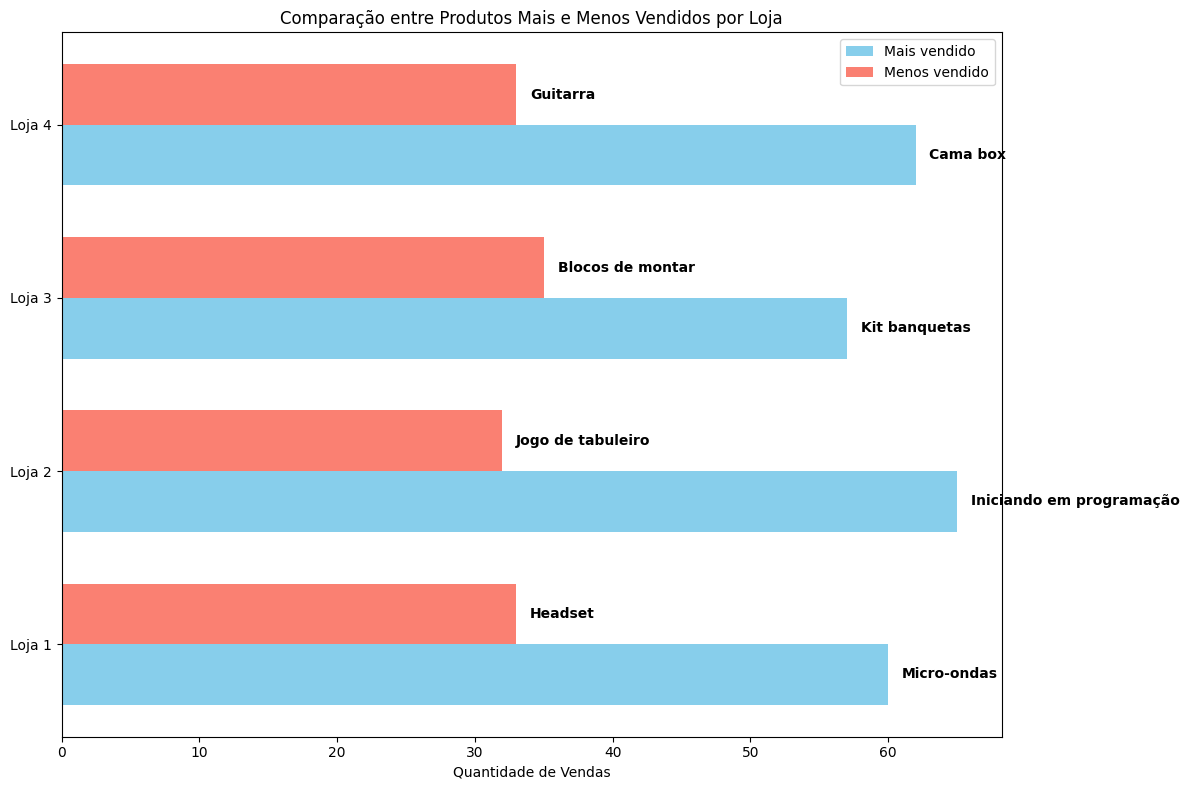

In [13]:
# Preparar os dados para o gráfico
lojas = [resultado[0] for resultado in resultados]
mais_vendidos = [resultado[1]['quantidade_mais_vendido'] for resultado in resultados]
menos_vendidos = [resultado[1]['quantidade_menos_vendido'] for resultado in resultados]
nomes_mais_vendidos = [resultado[1]['produto_mais_vendido'] for resultado in resultados]
nomes_menos_vendidos = [resultado[1]['produto_menos_vendido'] for resultado in resultados]

# Configurações do gráfico
fig, ax = plt.subplots(figsize=(12, 8))
bar_height = 0.35  # Altura das barras
indices = np.arange(len(lojas))  # Posições no eixo Y

# Criar as barras
bar1 = ax.barh(indices - bar_height/2, mais_vendidos, bar_height,
               color='skyblue', label='Mais vendido')
bar2 = ax.barh(indices + bar_height/2, menos_vendidos, bar_height,
               color='salmon', label='Menos vendido')

# Personalização
ax.set_yticks(indices)
ax.set_yticklabels(lojas)
ax.set_xlabel('Quantidade de Vendas')
ax.set_title('Comparação entre Produtos Mais e Menos Vendidos por Loja')
ax.legend()

# Adicionar os nomes dos produtos nas barras
for i, (v1, v2) in enumerate(zip(mais_vendidos, menos_vendidos)):
    ax.text(v1 + 1, i - bar_height/2, f"{nomes_mais_vendidos[i]}",
            ha='left', va='center', color='black', fontweight='bold')
    ax.text(v2 + 1, i + bar_height/2, f"{nomes_menos_vendidos[i]}",
            ha='left', va='center', color='black', fontweight='bold')

plt.tight_layout()
plt.show()

##grafico 05


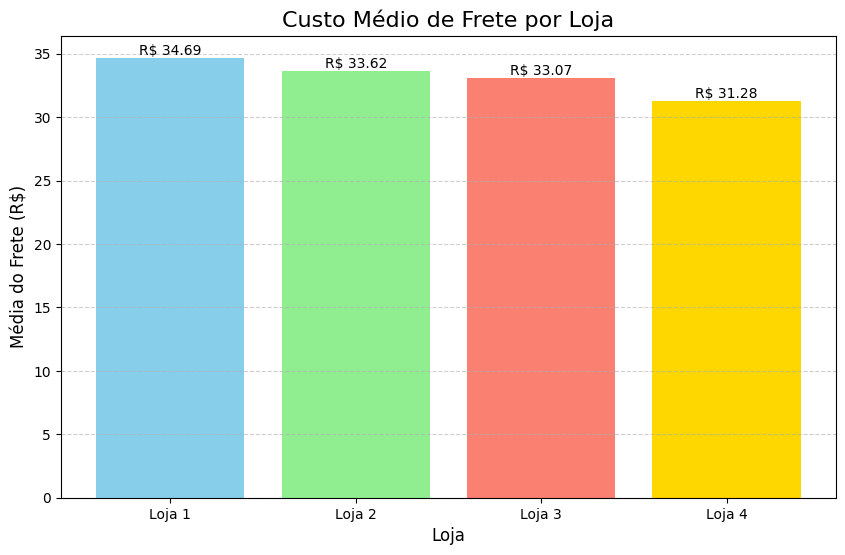

In [14]:
# Configurar o gráfico custo Médio de Frete por Loja
plt.figure(figsize=(10, 6))
bars = plt.bar(
    medias_frete['Loja'],
    medias_frete['Média do Frete (R$)'],
    color= ['skyblue', 'lightgreen', 'salmon', 'gold']
)

# Adicionar os valores em cima das barras
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'R$ {height:.2f}',
        ha='center',
        va='bottom'
    )

# Personalizar o gráfico
plt.title('Custo Médio de Frete por Loja', fontsize=16)
plt.xlabel('Loja', fontsize=12)
plt.ylabel('Média do Frete (R$)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

#Relatório

##Objetivo
Este relatório tem como objetivo avaliar o desempenho das 4 lojas com base em dados estratégicos e recomendar o encerramentodas atividades de uma delas, alinhando-se à visão de otimização de recursos e foco em resultados.

##Desempenho de Vendas
A análise dos dados revela que a Loja 3 apresenta um desempenho inferior em comparação com as demais lojas em diversos aspectos:​

- Volume de Vendas: A Loja 3 possui o menor volume de vendas entre todas as lojas.
- Faturamento: Consequentemente, seu faturamento é significativamente inferior, impactando negativamente a receita total da empresa.​

##Análise de Avaliações de Clientes
As avaliações dos clientes são um indicador crucial da satisfação e fidelização. A Loja 3 apresenta:​

- Avaliações Negativas: Uma proporção mediana de avaliações com notas 1, 2 e 3 , indicando insatisfação.​
- Avaliações Positivas: Maior número de avaliações com notas 5 em comparação com as outras lojas.​

##Conclusão e Recomendação
Com base nos pontos analisados, a Loja 3 apresenta desempenho inferior em vendas, menor satisfação dos clientes e baixa diversidade de produtos. Esses fatores combinados sugerem que a continuidade da operação da Loja 3 pode não ser viável no momento.​

Recomendação: Considerar o fechamento da Loja 3 ou a implementação de estratégias significativas de reestruturação para melhorar seu desempenho.

##Assinatura:
*Matheus H N Farias - Analista de dados.*

*Recife/PE - 22/04/2025*